<a href="https://colab.research.google.com/github/Trojan13/packgaabwir2022/blob/main/WIR_WiSe2223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of trec-covid dataset

In this chapter, we try to do an analysis of the metadata and tokens in the trec-covid dataset. It includes a description of the various fields present in the metadata and their statistics, such as the distribution of values and common patterns. The token analysis includes a description of the most frequent tokens in the dataset and their distribution, as well as an analysis of the vocabulary size and the presence of rare and out-of-vocabulary tokens.


## General information like topics/titles/qrels etc

In [3]:
import os
import pyterrier as pt
from IPython.display import display

if not pt.started():
  pt.init()



dataset = pt.datasets.get_dataset('irds:cord19/trec-covid')
pt_index_path = 'F:\Bibliotheken\Desktop\Skripte\packgaabwir2022\indices\cord19'

if not os.path.exists(pt_index_path + "/data.properties"):
  indexer = pt.index.IterDictIndexer(pt_index_path + "/data.properties", blocks=True)
  index_ref = indexer.index(dataset.get_corpus_iter(), 
                            fields=['title', 'doi', 'abstract'], 
                            meta=('docno',))
  
else:
  index_ref = pt.IndexRef.of(pt_index_path + "/data.properties")
  
index = pt.IndexFactory.of(index_ref)



15:42:30.289 [main] ERROR org.terrier.structures.Index - Problem loading index properties
java.io.FileNotFoundException: F:\Bibliotheken\Desktop\Skripte\packgaabwir2022\indices\cord19\data.properties (Zugriff verweigert)
	at java.base/java.io.FileInputStream.open0(Native Method)
	at java.base/java.io.FileInputStream.open(FileInputStream.java:216)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:157)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:111)
	at org.terrier.utility.io.LocalFileSystem.openFileStream(LocalFileSystem.java:124)
	at org.terrier.utility.Files.openFile(Files.java:339)
	at org.terrier.utility.Files.openFileStream(Files.java:682)
	at org.terrier.structures.IndexOnDisk.loadProperties(IndexOnDisk.java:474)
	at org.terrier.structures.IndexOnDisk.<init>(IndexOnDisk.java:144)
	at org.terrier.structures.PropertiesIndex.createIndex(PropertiesIndex.java:169)
	at org.terrier.structures.IndexOnDisk$DiskIndexLoader.load(IndexOnDisk.java:86)
	at

JavaException: JVM exception occurred: Could not load an index for ref F:\Bibliotheken\Desktop\Skripte\packgaabwir2022\indices\cord19/data.properties, even though IndexLoader org.terrier.structures.IndexOnDisk$DiskIndexLoader could support that type of index. It may be your ref had a wrong location; Terrier logs may have more information. java.lang.IllegalArgumentException

In [17]:
display(dataset.get_topics().columns)
display(dataset.get_topics())
display(dataset.get_qrels())


There are multiple query fields available: ('title', 'description', 'narrative'). To use with pyterrier, provide variant or modify dataframe to add query column.


Index(['qid', 'title', 'description', 'narrative'], dtype='object')

There are multiple query fields available: ('title', 'description', 'narrative'). To use with pyterrier, provide variant or modify dataframe to add query column.


,qid,title,description,narrative
0,1,coronavirus origin,what is the origin of COVID-19,seeking range of information about the SARS-Co...
1,2,coronavirus response to weather changes,how does the coronavirus respond to changes in...,seeking range of information about the SARS-Co...
2,3,coronavirus immunity,will SARS-CoV2 infected people develop immunit...,seeking studies of immunity developed due to i...
3,4,how do people die from the coronavirus,what causes death from Covid-19?,Studies looking at mechanisms of death from Co...
4,5,animal models of COVID-19,what drugs have been active against SARS-CoV o...,Papers that describe the results of testing d...
5,6,coronavirus test rapid testing,what types of rapid testing for Covid-19 have ...,Looking for studies identifying ways to diagno...
6,7,serological tests for coronavirus,are there serological tests that detect antibo...,Looking for assays that measure immune respons...
7,8,coronavirus under reporting,how has lack of testing availability led to un...,Looking for studies answering questions of imp...
8,9,coronavirus in Canada,how has COVID-19 affected Canada,"seeking data related to infections (confirm, s..."
9,10,coronavirus social distancing impact,has social distancing had an impact on slowing...,seeking specific information on studies that h...


,qid,docno,label,iteration
0,1,005b2j4b,2,4.5
1,1,00fmeepz,1,4
2,1,010vptx3,2,0.5
3,1,0194oljo,1,2.5
4,1,021q9884,1,4
...,...,...,...,...
69313,50,zvop8bxh,2,5
69314,50,zwf26o63,1,5
69315,50,zwsvlnwe,0,5
69316,50,zxr01yln,1,5


In [20]:
import pandas as pd
metadata = pd.read_csv('~/.ir_datasets/cord19/2020-07-16/metadata.csv')
metadata.columns

C:\Users\timm_\AppData\Local\Temp\ipykernel_8440\4281082646.py:2: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('~/.ir_datasets/cord19/2020-07-16/metadata.csv')


Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')

## Distribution of publish times of the sources

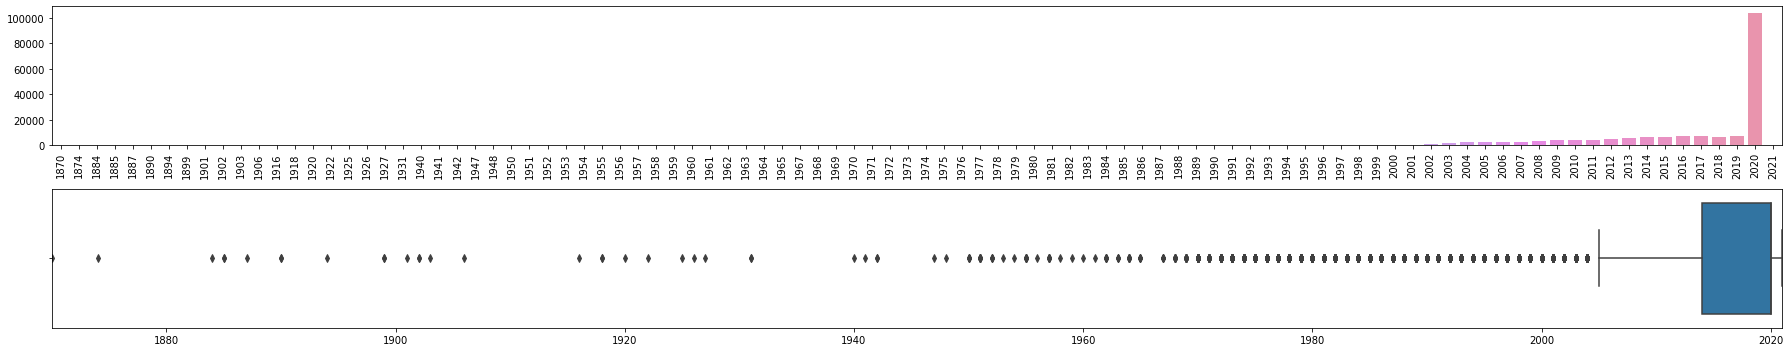

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

years = metadata["publish_time"]
years.dropna(inplace=True)

def getYear(dateString):
    strSplit = dateString.split('-')
    return int(strSplit[0])

years = list(map(getYear,years))
u_years, u_counts = np.unique(years, return_counts=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 5))

sns.barplot(x=u_years, y=u_counts, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

sns.boxplot(x=years, ax=ax2, orient="h")
ax2.margins(0)

fig.tight_layout()
fig.savefig("./dates.png")

## Missing Data in Metadata

In [20]:
metadata.replace("", pd.NA, inplace=True)

for col in metadata:
  m = sum(metadata[col].isna())
  p = m / len(metadata) * 100
  print(f"{col:10} {m:5} ({p:.2f}%)")

cord_uid       0 (0.00%)
sha        112754 (58.57%)
source_x       0 (0.00%)
title         50 (0.03%)
doi        55274 (28.71%)
pmcid      105999 (55.06%)
pubmed_id  75205 (39.07%)
license        0 (0.00%)
abstract   54865 (28.50%)
publish_time    18 (0.01%)
authors     6477 (3.36%)
journal    10718 (5.57%)
mag_id     192509 (100.00%)
who_covidence_id 142184 (73.86%)
arxiv_id   190045 (98.72%)
pdf_json_files 112754 (58.57%)
pmc_json_files 129773 (67.41%)
url        41453 (21.53%)
s2_id      27865 (14.47%)


## Token Statistics

In [2]:
print(index.getCollectionStatistics())

Number of documents: 192509
Number of terms: 171154
Number of postings: 12375701
Number of fields: 3
Number of tokens: 19557770
Field names: [title, doi, abstract]
Positions:   true



 Add all tokens to the tokens array

In [3]:
tokens = []
for kv in index.getLexicon():
    tokens.append([kv.getKey(),	kv.getValue().getFrequency()])
tokens = sorted(tokens,key=lambda x: int(x[1]),reverse=True) #sorting

In [ ]:
print(tokens)

In [4]:
from collections import Counter

print("\n[Number of Tokens]")
print("Tokens:", len(tokens))

k = 10
bottom_k_tokens = tokens[-k:]
top_k_tokens = tokens[:k]
print(f"\n[Top {k} most common Tokens]")
print(f"Tokens: {', '.join([''.join(x[0]) for x in top_k_tokens])}")

print(f"\n[Bottom {k} least common Tokens]")
print(f"Tokens: {', '.join([''.join(x[0]) for x in bottom_k_tokens])}")



[Number of Tokens]
Tokens: 171154

[Top 10 most common Tokens]
Tokens: patient, 19, covid, 10, 2, infect, studi, diseas, 0, 1

[Bottom 10 least common Tokens]
Tokens: zytomegalieviru, zytopathisch, zytoplasma, zytoplasmabereich, zytoplasmamatrix, zytoskelett, zytostatisch, zytostatischen, zzfny, zzm002


This gives us a first insight into the functions and limitations of the used stemmers and the stop word list. 
The tokens 'cytostatic' and 'cytostatic' should actually be stemmed. Apparently the stemmer does not work well with german words.

The tokens '1' and '0' are not words and might have to be excluded first.

{'patient': 207768, '19': 207160, 'covid': 200606, '10': 168251, '2': 150533, 'infect': 140876, 'studi': 115534, 'diseas': 113187, '0': 109999, '1': 109655, 'sar': 88004, 'result': 87843, 'viru': 86453, 'cov': 80469, 'case': 74746, 'cell': 74186, '3': 72083, 'coronaviru': 71479, 'health': 69624, 'clinic': 68865, 'respiratori': 67791, 'pandem': 61906, 'effect': 61554, 'method': 58321, 'sever': 55701, '5': 55494, 'treatment': 54526, 'group': 54031, 'includ': 53465, 'time': 53366}


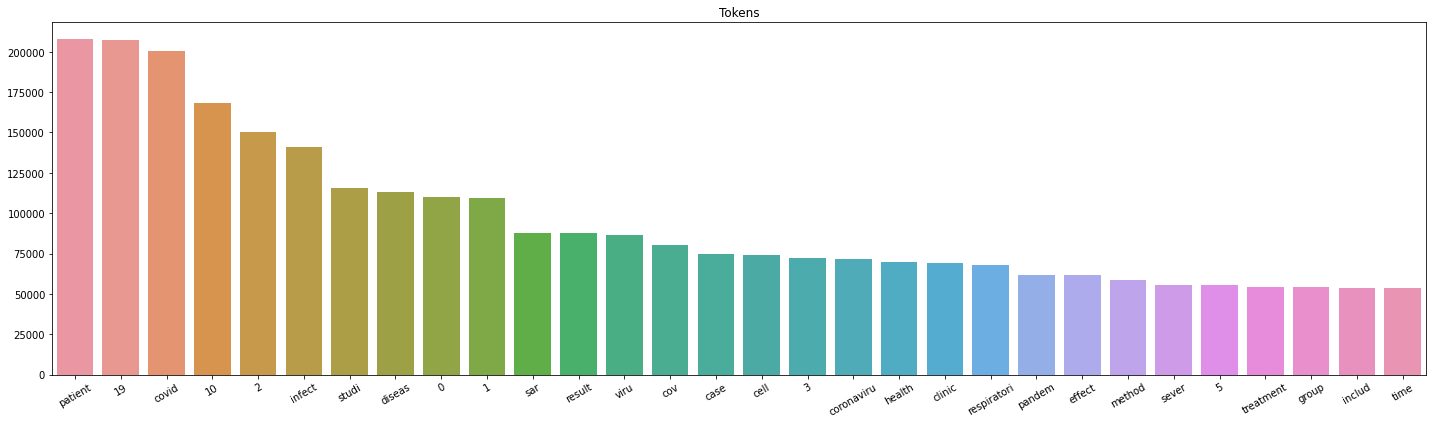

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

k = 30

common_tokens = dict(tokens[:k])
print(common_tokens)
x_token = list(common_tokens.keys())
y_token = list(common_tokens.values())


fig, ax1 = plt.subplots(1, 1, figsize=(20, 6))
sns.barplot(x=x_token, y=y_token, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
ax1.set_title("Tokens")
fig.tight_layout()

fig.savefig("./most_common.png")